In [39]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [40]:
bestsellerdata = pd.read_csv('bestsellerswithcategories.csv',sep =',',header = 0)
bestsellerdata.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


In [41]:
# Dropping duplicates
df = bestsellerdata.copy()
df.drop_duplicates(inplace=True,subset=['Name'])
df.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 546
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         351 non-null    object 
 1   Author       351 non-null    object 
 2   User Rating  351 non-null    float64
 3   Reviews      351 non-null    int64  
 4   Price        351 non-null    int64  
 5   Year         351 non-null    int64  
 6   Genre        351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


## Checking for missing values

In [43]:
df.isna().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

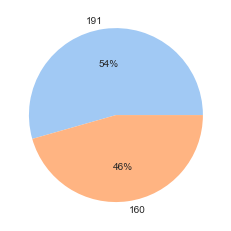

In [44]:
colors = sns.color_palette('pastel')[0:2]
datapie =  df['Genre'].value_counts()
labels = datapie.unique()
plt.pie(datapie, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

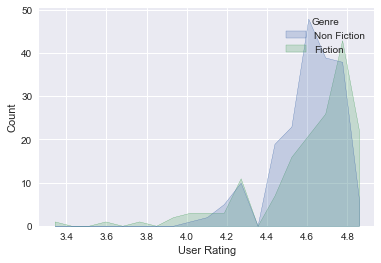

In [45]:
sns.histplot(x=df['User Rating'],hue=df['Genre'],element='poly')
plt.show()

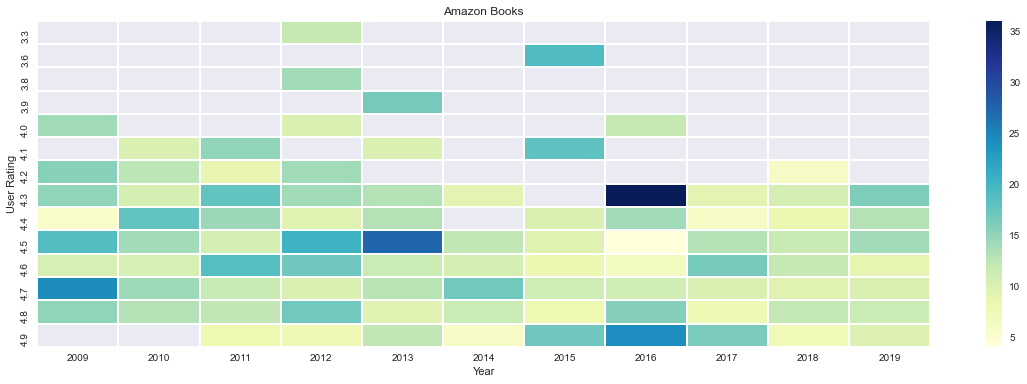

In [46]:
plt.figure(figsize=(20, 6)) # Set the size

amazon = df.pivot_table(
    index='User Rating', 
    columns='Year',
    values='Price'
)

sns.heatmap( 
    amazon, 
    cmap='YlGnBu',
    linecolor='white', 
    linewidth=1 
)

plt.title('Amazon Books')
plt.show() # Show 

## Top 10 reviewed books

In [47]:
top10_alltime = df[['Name', 'Author', 'Reviews','User Rating']].drop_duplicates()
top10_alltime.sort_values('Reviews',ascending=False)[:10]

,Name,Author,Reviews,User Rating
534,Where the Crawdads Sing,Delia Owens,87841,4.8
382,The Girl on the Train,Paula Hawkins,79446,4.1
32,Becoming,Michelle Obama,61133,4.8
135,Gone Girl,Gillian Flynn,57271,4.0
365,The Fault in Our Stars,John Green,50482,4.7
437,The Nightingale: A Novel,Kristin Hannah,49288,4.8
106,Fifty Shades of Grey: Book One of the Fifty Sh...,E L James,47265,3.8
433,The Martian,Andy Weir,39459,4.7
20,All the Light We Cannot See,Anthony Doerr,36348,4.6
338,The Alchemist,Paulo Coelho,35799,4.7


## Number of Books per Year

Text(0.5, 1.0, 'Number of Books per Year')

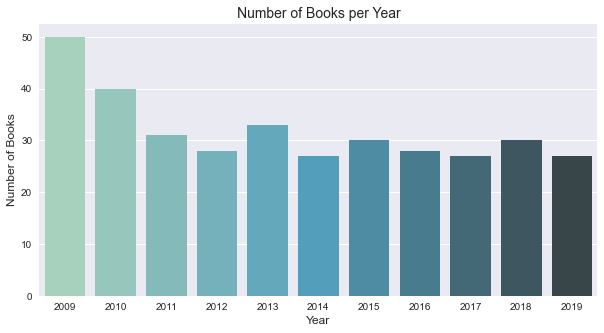

In [48]:
books = df.groupby('Year', as_index=False)['Name'].count().sort_values(by='Name', ascending=False)
plt.figure(figsize=(10,5))
ax3 = sns.barplot(x=books['Year'], y=books['Name'], palette='GnBu_d')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.title('Number of Books per Year', fontsize=14)

# Book Recommendation

### Feature engineering

In [49]:
df.drop(['Name','Year'], axis=1).columns

Index(['Author', 'User Rating', 'Reviews', 'Price', 'Genre'], dtype='object')

In [50]:
author_stats = df.groupby('Author')['Year'].count().reset_index()
author_stats.describe()

,Year
count,248.000000
mean,1.415323
std,1.272922
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,12.000000


In [51]:
sum(df['Author'].value_counts()[df['Author'].value_counts() >= 3])

95

In [52]:
others = df['Author'].value_counts()[df['Author'].value_counts() <3].keys()
df['Author'].replace(others,'Others',inplace=True)
df['Author'].value_counts()

Others              256
Jeff Kinney          12
Rick Riordan         10
Stephenie Meyer       7
Dav Pilkey            6
Bill O'Reilly         6
J.K. Rowling          6
John Grisham          5
Suzanne Collins       5
E L James             5
Stieg Larsson         4
Stephen King          4
Charlaine Harris      4
Veronica Roth         3
Glenn Beck            3
Malcolm Gladwell      3
Ina Garten            3
Gary Chapman          3
Dan Brown             3
Ree Drummond          3
Name: Author, dtype: int64

In [53]:
author = df['Author']
author = pd.get_dummies(author)

In [54]:
df.drop('Author',axis=1,inplace=True)
df = pd.concat([df,author],axis=1)
df.head(3)

,Name,User Rating,Reviews,Price,Year,Genre,Bill O'Reilly,Charlaine Harris,Dan Brown,Dav Pilkey,...,John Grisham,Malcolm Gladwell,Others,Ree Drummond,Rick Riordan,Stephen King,Stephenie Meyer,Stieg Larsson,Suzanne Collins,Veronica Roth
0,10-Day Green Smoothie Cleanse,4.7,17350,8,2016,Non Fiction,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,11/22/63: A Novel,4.6,2052,22,2011,Fiction,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,12 Rules for Life: An Antidote to Chaos,4.7,18979,15,2018,Non Fiction,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [55]:
df['Genre'].replace(['Non Fiction','Fiction'],[0, 1],inplace=True)

In [56]:
len(df)

351

In [57]:
book_names = pd.DataFrame({'Name':df['Name']})
book_names.index = [i for i in range(len(df))]

In [58]:
df.set_index('Name',inplace=True)

### Feature Scaling

In [59]:
cols = ['User Rating', 'Reviews', 'Price', 'Year']
minmax = MinMaxScaler()
scalled = minmax.fit_transform(df[cols])
dfscale = pd.DataFrame(scalled)
dfscale.columns =['UserRatingScaled', 'ReviewsScaled', 'PriceScaled', 'YearScaled']
dfscale.index = df.index

In [60]:
dfscale.head(3)

,UserRatingScaled,ReviewsScaled,PriceScaled,YearScaled
Name,,,,
10-Day Green Smoothie Cleanse,0.8750,0.197178,0.076190,0.7
11/22/63: A Novel,0.8125,0.022949,0.209524,0.2
12 Rules for Life: An Antidote to Chaos,0.8750,0.215730,0.142857,0.9


In [61]:
df = pd.concat([df,dfscale],axis = 1)

In [62]:
dffinal = df.drop(['User Rating', 'Reviews', 'Price', 'Year'], axis = 1)
dffinal.head(3)

,Genre,Bill O'Reilly,Charlaine Harris,Dan Brown,Dav Pilkey,E L James,Gary Chapman,Glenn Beck,Ina Garten,J.K. Rowling,...,Rick Riordan,Stephen King,Stephenie Meyer,Stieg Larsson,Suzanne Collins,Veronica Roth,UserRatingScaled,ReviewsScaled,PriceScaled,YearScaled
Name,,,,,,,,,,,,,,,,,,,,,
10-Day Green Smoothie Cleanse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.8750,0.197178,0.076190,0.7
11/22/63: A Novel,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.8125,0.022949,0.209524,0.2
12 Rules for Life: An Antidote to Chaos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.8750,0.215730,0.142857,0.9


In [63]:
def getRecommendation_books_for(book_name,no_of_books=3,get_similarity_rate=False):
    #NearestNeighbors Algorithm to get Nearest  Book values
    knn = NearestNeighbors(n_neighbors=no_of_books+1,metric='manhattan')
    knn.fit(dffinal)
    
    print(f'Similar Books for "{book_name[0]}":')
    
    #indices Indicated the index value of the recommended books
    distances, indices = knn.kneighbors(dffinal.loc[book_name])
    nearest_books = [book_names.loc[i][0] for i in indices.flatten()][1:]
    
    if not get_similarity_rate:
        return nearest_books
    
    sim_rates = []
    for book in nearest_books:
        sim = cosine_similarity(dffinal.loc[book_name],[dffinal.loc[book]]).flatten()
        sim_rates.append(sim[0])
    bookname =[ book_name[0]]*len(nearest_books) 
    recommended_books = pd.DataFrame({'Book':bookname,'Recommended Books':nearest_books,'Similarity':sim_rates})
    recommended_books.sort_values(by='Similarity',ascending=True)
    return recommended_books

In [64]:
getRecommendation_books_for(book_names.loc[339],3,True)

Similar Books for "What to Expect When You're Expecting":


,Book,Recommended Books,Similarity
0,What to Expect When You're Expecting,The Lego Ideas Book: Unlock Your Imagination,0.999494
1,What to Expect When You're Expecting,Eat to Live: The Amazing Nutrient-Rich Program...,0.998826
2,What to Expect When You're Expecting,Food Rules: An Eater's Manual,0.996595


# User Rating Prediction

In [65]:
bestsellerdata.head(3)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


In [66]:
encoder = LabelEncoder()
bestsellerdata['Author'] = encoder.fit_transform(bestsellerdata['Author'])
bestsellerdata['Genre'] = encoder.fit_transform(bestsellerdata['Genre'])

In [67]:
# Checking for outliers

def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(bestsellerdata[col],ax = ax1)
    sns.boxplot(bestsellerdata[col],ax = ax2)

C:\Users\AndreaRosales\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AndreaRosales\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


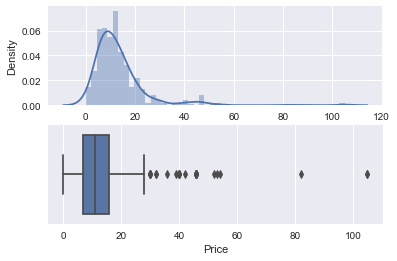

In [68]:
plot(bestsellerdata,'Price')

In [69]:
# We will replace outliers with median else they may affect our ML model

In [70]:
bestsellerdata['Price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

In [71]:
bestsellerdata['Price'] = np.where(bestsellerdata['Price']>40, bestsellerdata['Price'].median(),bestsellerdata['Price'])

C:\Users\AndreaRosales\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AndreaRosales\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


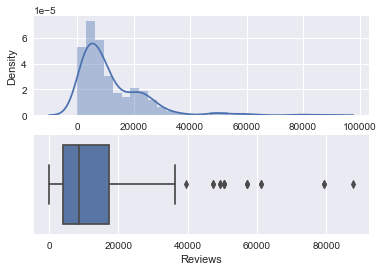

In [72]:
plot(bestsellerdata,'Reviews')

In [73]:
bestsellerdata['Reviews'] = np.where(bestsellerdata['Reviews'] >40000,bestsellerdata['Reviews'].median(),bestsellerdata['Reviews'] )

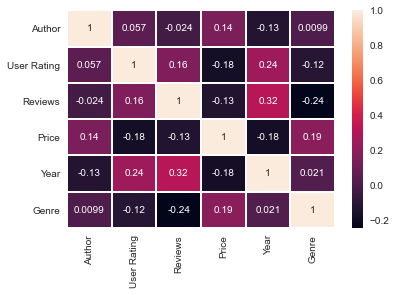

In [74]:
# Checking for correlations
sns.heatmap(bestsellerdata.corr(), annot= True, linewidths=1,linecolor='white')

plt.show()

## Train Prediction Model

In [76]:
import h2o
from h2o.automl import *

In [77]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...


H2OStartupError: Cannot find Java. Please install the latest JRE from
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/welcome.html#java-requirements

In [ ]:
dataset = h2o.H2OFrame(dffinal)

In [ ]:
# Independent Variable
X = bestsellerdata.drop(['User Rating','Name'], axis = 1)